# Integral Fourier Transform and frequency-domain analysis #

In [1]:
import sympy as sp

In [2]:
tau= sp.symbols('tau',real=True,positive = True)
t = sp.symbols('t',real=True)

## Example Function of Time ##

In [3]:
f = sp.Heaviside(t-tau)-sp.Heaviside(t-2*tau)

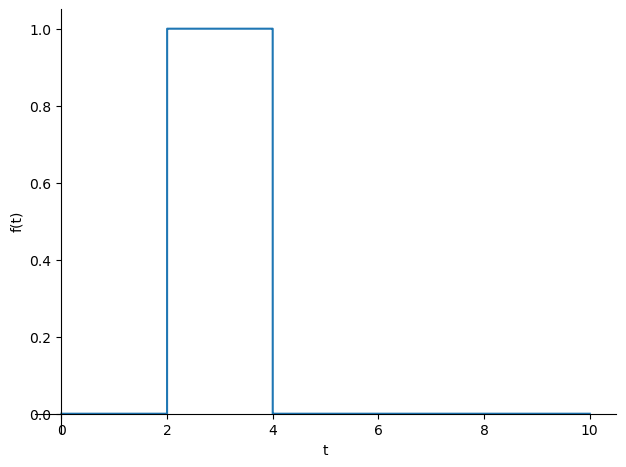

In [4]:
sp.plot(f.subs(tau,2),(t,0,10));

In [18]:
omega = sp.symbols('omega',real=True,positive=True)
f_omega = sp.integrate(f*sp.exp(-sp.I*omega*t), (t,-sp.oo,sp.oo))
f_omega2 = sp.fourier_transform(f,t,omega) 
f_omega = sp.simplify(f_omega)
f_omega2 = sp.simplify(f_omega2)
display(f_omega)
display(f_omega2)

I*(1 - exp(I*omega*tau))*exp(-2*I*omega*tau)/omega

I*(1 - exp(2*I*pi*omega*tau))*exp(-4*I*pi*omega*tau)/(2*pi*omega)

Another definition for the fourier transformation is used by sympy

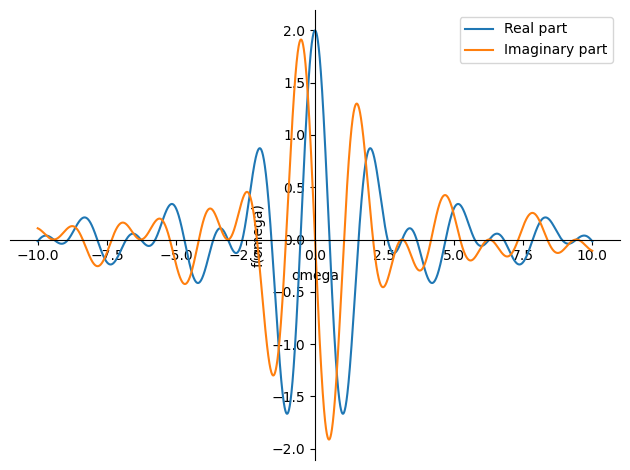

In [6]:
p0 = sp.plotting.plot(sp.re(f_omega.subs([(tau,2)])),(omega,-10,10),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(f_omega.subs([(tau,2)])),(omega,-10,10),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [7]:
x = sp.symbols('x',cls = sp.Function)
m, c, k = sp.symbols('m, c, k',real=True,positive=True)
Equation_of_Motion = m*sp.diff(x(t),t,2)+c*sp.diff(x(t),t)+k*x(t)-f
display(Equation_of_Motion)

c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)) + Heaviside(t - 2*tau) - Heaviside(t - tau)

In [13]:
omega = sp.symbols('omega',real=True,positive=True)
Equation_of_Motion_in_frequency_domain_homogeneous = sp.integrate((m*sp.diff(x(t),t,2)+c*sp.diff(x(t),t)+k*x(t))*sp.exp(-sp.I*omega*t),(t,-sp.oo,sp.oo))
display(Equation_of_Motion_in_frequency_domain_homogeneous)

Integral((c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)))*exp(-I*omega*t), (t, -oo, oo))

The equation isn't evaluated (derivatives are not taken into the integral)

In [14]:
sp.factor(Equation_of_Motion_in_frequency_domain_homogeneous,sp.integrate(x(t)*sp.exp(-sp.I*omega*t),(t,-sp.oo,sp.oo)))

Integral((c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)))*exp(-I*omega*t), (t, -oo, oo))

Asking for the equation as factor of $\int\limits_{-\infty}^{\infty} x{\left(t \right)} e^{- i \omega t}\, dt$ doesn't work.

Another alternative is chosen, by integrating the individual terms:

In [15]:
Equation_of_Motion_in_frequency_domain_homogeneous = (sp.integrate(m*sp.diff(x(t)*sp.exp(-sp.I*omega*t),t,2),(t,-sp.oo,sp.oo))+
                                          sp.integrate(c*sp.diff(x(t)*sp.exp(-sp.I*omega*t),t),(t,-sp.oo,sp.oo))+
                                          sp.integrate(k*x(t)*sp.exp(-sp.I*omega*t),(t,-sp.oo,sp.oo)))
display(Equation_of_Motion_in_frequency_domain_homogeneous)

c*(Integral(exp(-I*omega*t)*Derivative(x(t), t), (t, -oo, oo)) + Integral(-I*omega*x(t)*exp(-I*omega*t), (t, -oo, oo))) + k*Integral(x(t)*exp(-I*omega*t), (t, -oo, oo)) + m*(Integral(exp(-I*omega*t)*Derivative(x(t), (t, 2)), (t, -oo, oo)) + Integral(-omega**2*x(t)*exp(-I*omega*t), (t, -oo, oo)) + Integral(-2*I*omega*exp(-I*omega*t)*Derivative(x(t), t), (t, -oo, oo)))

In [11]:
sp.factor(Equation_of_Motion_in_frequency_domain_homogeneous,sp.integrate(x(t)*sp.exp(-sp.I*omega*t),(t,-sp.oo,sp.oo)))

c*Integral(exp(-I*omega*t)*Derivative(x(t), t), (t, -oo, oo)) + c*Integral(-I*omega*x(t)*exp(-I*omega*t), (t, -oo, oo)) + k*Integral(x(t)*exp(-I*omega*t), (t, -oo, oo)) + m*Integral(exp(-I*omega*t)*Derivative(x(t), (t, 2)), (t, -oo, oo)) + m*Integral(-omega**2*x(t)*exp(-I*omega*t), (t, -oo, oo)) + m*Integral(-2*I*omega*exp(-I*omega*t)*Derivative(x(t), t), (t, -oo, oo))

Again, the equation isn't fully evaluated (derivaties are not taken into the integrals).

The function $x(t)$ is therefore manually replaced by $x(\omega)$ and is divided by $\int\limits_{-\infty}^{\infty} x{\left(t \right)} e^{- i \omega t}\, dt$.

In [22]:
X = sp.symbols('X',cls = sp.Function)
Equation_of_Motion_in_frequency_domain_homogeneous = Equation_of_Motion_in_frequency_domain_homogeneous.subs(x(t),X(omega))
display(Equation_of_Motion_in_frequency_domain_homogeneous)

c*(Integral(exp(-I*omega*t)*Derivative(X(omega), t), (t, -oo, oo)) + Integral(-I*omega*X(omega)*exp(-I*omega*t), (t, -oo, oo))) + k*Integral(X(omega)*exp(-I*omega*t), (t, -oo, oo)) + m*(Integral(exp(-I*omega*t)*Derivative(X(omega), (t, 2)), (t, -oo, oo)) + Integral(-omega**2*X(omega)*exp(-I*omega*t), (t, -oo, oo)) + Integral(-2*I*omega*exp(-I*omega*t)*Derivative(X(omega), t), (t, -oo, oo)))

In [23]:
Equation_of_Motion_in_frequency_domain_homogeneous = sp.simplify(Equation_of_Motion_in_frequency_domain_homogeneous)
display(Equation_of_Motion_in_frequency_domain_homogeneous)

(-I*c*omega + k - m*omega**2)*X(omega)*Integral(exp(-I*omega*t), (t, -oo, oo))

In [24]:
Equation_of_Motion_in_frequency_domain_homogeneous = sp.simplify(Equation_of_Motion_in_frequency_domain_homogeneous / sp.integrate(sp.exp(-sp.I*omega*t),(t,-sp.oo,sp.oo)))
display(Equation_of_Motion_in_frequency_domain_homogeneous)

(-I*c*omega + k - m*omega**2)*X(omega)

In [25]:
Equation_of_Motion_in_frequency_domain = Equation_of_Motion_in_frequency_domain_homogeneous-f_omega
display(Equation_of_Motion_in_frequency_domain)

(-I*c*omega + k - m*omega**2)*X(omega) - I*(1 - exp(I*omega*tau))*exp(-2*I*omega*tau)/omega

In [26]:
solution_in_frequency_domain = sp.solve(sp.Eq(Equation_of_Motion_in_frequency_domain,0),X(omega))[0]
display(solution_in_frequency_domain)
solution_in_frequency_domain = -sp.I*(-sp.exp(-2*sp.I*tau*omega) + sp.exp(-sp.I*tau*omega))*1/(omega*(-m*omega**2 + k + c*omega*sp.I))
display(solution_in_frequency_domain)

I*(exp(I*omega*tau) - 1)*exp(-2*I*omega*tau)/(omega*(I*c*omega - k + m*omega**2))

-I*(exp(-I*omega*tau) - exp(-2*I*omega*tau))/(omega*(I*c*omega + k - m*omega**2))

Something goed wrong with the +/- here. Second solution is the right one.

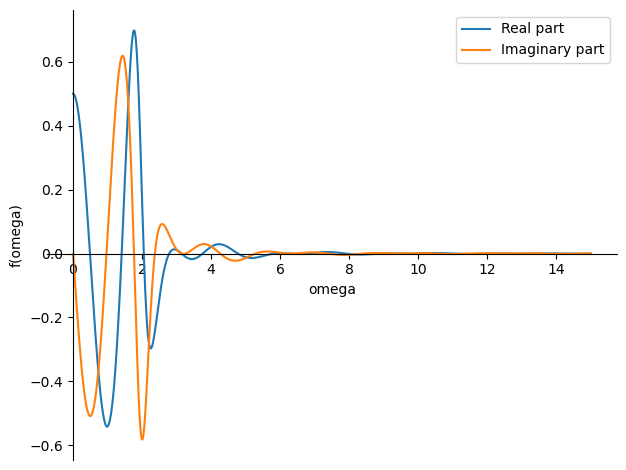

In [27]:
p0 = sp.plotting.plot(sp.re(solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,0.75)])),(omega,0.001,15),label='Real part' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(sp.im(solution_in_frequency_domain.subs([(tau,2),(k,4),(m,1),(c,0.75)])),(omega,0.001,15),label='Imaginary part',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [33]:
solution = 1/(2*sp.pi)*sp.integrate(solution_in_frequency_domain*sp.exp(sp.I*omega*t),(omega,-sp.oo,sp.oo))
display(solution)

(-Integral(-exp(I*omega*t)/(c*omega**2*exp(2*I*omega*tau) - I*k*omega*exp(2*I*omega*tau) + I*m*omega**3*exp(2*I*omega*tau)), (omega, -oo, oo)) - Integral(exp(I*omega*t)*exp(I*omega*tau)/(c*omega**2*exp(2*I*omega*tau) - I*k*omega*exp(2*I*omega*tau) + I*m*omega**3*exp(2*I*omega*tau)), (omega, -oo, oo)))/(2*pi)

Function is not evaluated

In [35]:
solution.subs([(tau,2),(k,4),(m,1),(c,0.75)]).evalf()

-0.159154943091895*Integral(-exp(I*omega*t)/(I*omega**3*exp(4*I*omega) + 0.75*omega**2*exp(4*I*omega) - 4*I*omega*exp(4*I*omega)), (omega, -oo, oo)) - 0.159154943091895*Integral(exp(2*I*omega)*exp(I*omega*t)/(I*omega**3*exp(4*I*omega) + 0.75*omega**2*exp(4*I*omega) - 4*I*omega*exp(4*I*omega)), (omega, -oo, oo))